In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('Solarize_Light2')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\91891\Desktop\Medical_cost_prediction\Data\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
print('For numeraical variables:\n\n', df.describe()),print('-'*100), print('For categorical variables:\n\n',df.describe(include=['object']))

For numeraical variables:

                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
----------------------------------------------------------------------------------------------------
For categorical variables:

          sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


(None, None, None)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

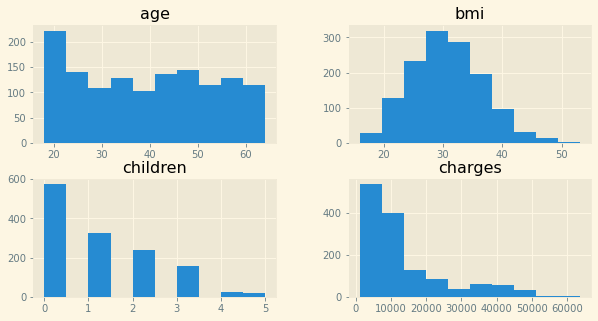

In [8]:
df.hist(figsize=(10,5))

In [9]:
df1 = df.copy()

In [10]:
# Checking the unique elements of the categorical variables
for i in df.select_dtypes('object').columns:
    print(f'The unique elements in {i} are {df[i].unique()}\n')


The unique elements in sex are ['female' 'male']

The unique elements in smoker are ['yes' 'no']

The unique elements in region are ['southwest' 'southeast' 'northwest' 'northeast']



In [11]:
#creating function to change the features sex and smoker from categorical to numerical 
def categorical_to_numerical(x):
    if x=='male' or x=='no':
        return 0
    else:
        return 1

In [12]:
#applying the function categorical_to_numerical to the features sex and smoker.
df['smoker']=df['smoker'].apply(categorical_to_numerical)
df['sex']=df['sex'].apply(categorical_to_numerical)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [14]:
df['sex'].unique()

array([1, 0], dtype=int64)

# Exploratory Data Analysis

<AxesSubplot:>

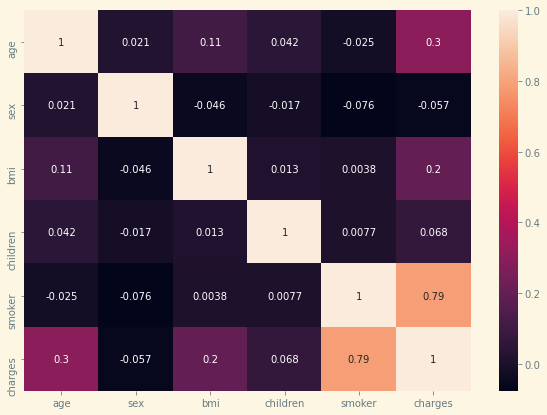

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

<b>The heatmap shows that the variable charges are strongly related with smoker variable. The variable charges also holds some correlation with bmi and ages.</b>

Text(0.5, 1.0, 'Charges based on bmi')

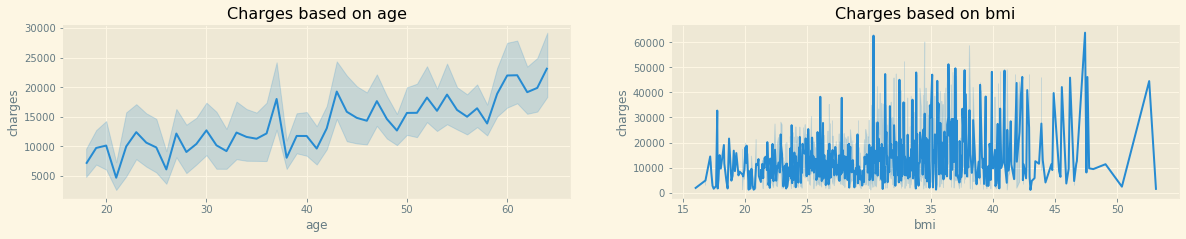

In [16]:
plt.figure(figsize=(20,7))
plt.subplot(2,2,1)
sns.lineplot(df['age'], df['charges']).set_title('Charges based on age')

plt.subplot(2,2,2)
sns.lineplot(df1['bmi'], df1['charges']).set_title('Charges based on bmi')

<b>The above plot shows that as the age and bmi (or body mass index) increases, the medical cost insurance cost increases.</b>

Text(0.5, 1.0, 'Charges based on region')

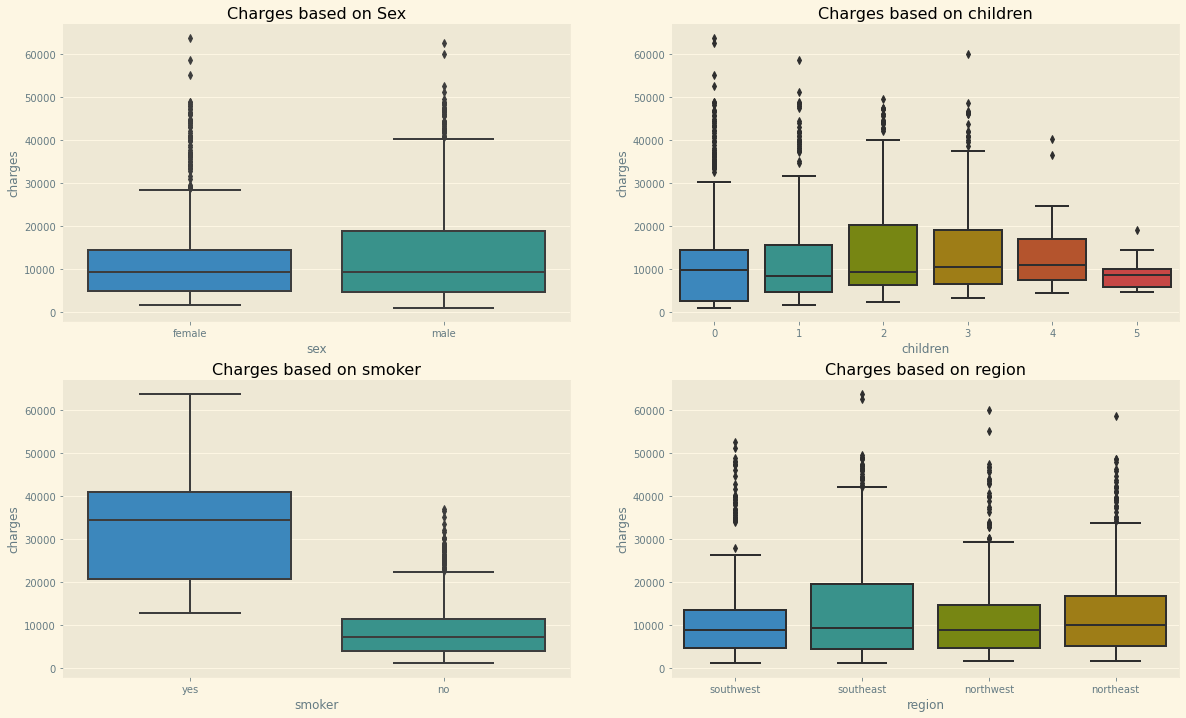

In [17]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(df1['sex'], df1['charges']).set_title('Charges based on Sex')

plt.subplot(2,2,2)
sns.boxplot(df1['children'], df1['charges']).set_title('Charges based on children')

plt.subplot(2,2,3)
sns.boxplot(df1['smoker'], df1['charges']).set_title('Charges based on smoker')

plt.subplot(2,2,4)
sns.boxplot(df1['region'], df1['charges']).set_title('Charges based on region')

1. The first plot shows that the medical insurance cost for males is higher as comparison to females.
2. The second plot shows that the medical insurance cost for people having less children is higher.
1. The third plot shows that the medical insurance cost for smokers is higher as comparison to non-smokers.
2. The fourth plot shows that the medical insurance cost for people living in southeast region is higher.

### Lets find out why medical charges for males, people having less children and people living in southeast region is higher.

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
df2 = df.groupby('children')['smoker'].count().reset_index()
df2

,children,smoker
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


In [20]:
df3 = df1.groupby('sex')['smoker'].count().reset_index()
df3

,sex,smoker
0,female,662
1,male,676


In [21]:
df4 = df1.groupby('region')['smoker'].count().reset_index()
df4

,region,smoker
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


Text(0.5, 1.0, 'Smokers vs Region')

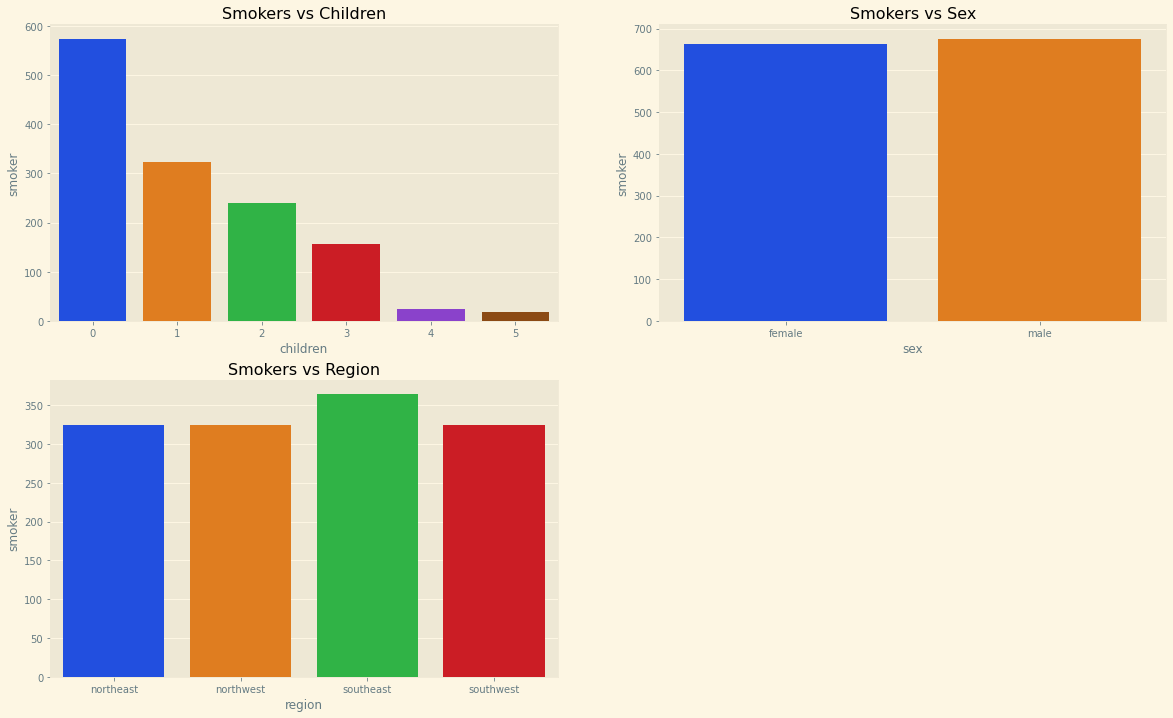

In [22]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(df2['children'], df2['smoker'], palette= 'bright').set_title('Smokers vs Children')


plt.subplot(2,2,2)
sns.barplot(df3['sex'], df3['smoker'], palette= 'bright').set_title('Smokers vs Sex')

plt.subplot(2,2,3)
sns.barplot(df4['region'], df4['smoker'], palette= 'bright').set_title('Smokers vs Region')

1. The first plot shows that the number smokers is highest among the people having no children. 
2. The second plot shows that the number smokers is highest among the males. 
3. The third plot shows that the number smokers is highest among the people living in the southeast region. 

<b>Lets find out why the number of smokers in the southeast region is higher.</b>

In [23]:
df5 = df.groupby(['region', 'children'])['smoker'].agg('count').reset_index()
df5.head()

,region,children,smoker
0,northeast,0,147
1,northeast,1,77
2,northeast,2,51
3,northeast,3,39
4,northeast,4,7


Text(0.5, 1.0, 'Smokers with the number of children in different region')

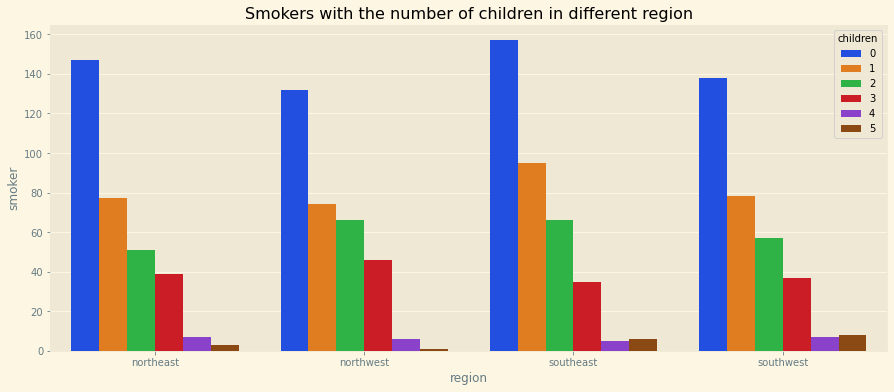

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(df5['region'], df5['smoker'], hue = df5['children'], palette= 'bright').set_title('Smokers with the number of children in different region')

As we can see the number of people having no children is the highest in the southeast region. This indicates that having no children is biggest reason why people smoke.

In [33]:
df6 = df.groupby(['region', 'sex'])['smoker'].agg('count').reset_index()
df6.head()

,region,sex,smoker
0,northeast,0,163
1,northeast,1,161
2,northwest,0,161
3,northwest,1,164
4,southeast,0,189


Text(0.5, 1.0, 'Smokers in different regions based on sex')

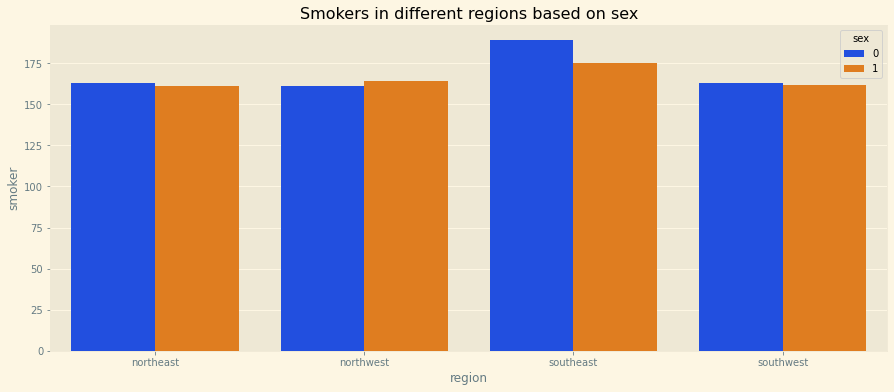

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(df6['region'], df6['smoker'], hue = df6['sex'], palette= 'bright').set_title('Smokers in different regions based on sex')

**Note that 0 represents male and 1 represents female**.

The above plot shows that the number of males in the southeast region is the highest among all other regions. This is one more reason why the number of smokers in the southeast region is the highest.

# Data Preprocessing

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [27]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
def region_to_numerical(x):
    if x=='southwest':
        return 0
    elif x=='southeast':
        return 1
    elif x=='northwest':
        return 2
    else:
        return 3

In [29]:
df['region'] = df['region'].apply(region_to_numerical)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [30]:
df['region'].unique()

array([0, 1, 2, 3], dtype=int64)

# Model Building

In [31]:
X = df.drop('charges',axis=1)
y = df['charges']

In [32]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (1338, 6)
The shape of y is (1338,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
model=[]
model.append(('RandomForest Regressor', RandomForestRegressor()))

model.append(('DecisionTree Regressor', DecisionTreeRegressor()))

model.append(('XGBoost Regressor', XGBRegressor()))
for name,model in model:
    print(name)
    model.fit(X_train,y_train)
 
    y_pred=model.predict(X_test)
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error( y_test, y_pred)
    r2_score = r2_score( y_test, y_pred)
    print(f'The root mean squared error is {np.sqrt(mse)}')
    print(f'The r2_score is {r2_score}')
    print('-'*80)

RandomForest Regressor
The root mean squared error is 4516.871907380992
The r2_score is 0.8717895012983934
--------------------------------------------------------------------------------
DecisionTree Regressor
The root mean squared error is 7585.73170680355
The r2_score is 0.6383878643098013
--------------------------------------------------------------------------------
XGBoost Regressor
The root mean squared error is 4810.899150659462
The r2_score is 0.8545544138886668
--------------------------------------------------------------------------------


In [35]:
# Number of trees in the random forest
n_estimators=[int(x) for x in np.linspace(start = 10,stop = 300,num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in trees
max_depth = [2,4,6]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Minimum number of somples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]


from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': n_estimators,
           "max_features": max_features,
           'max_depth' : max_depth,
           'min_samples_split' : min_samples_split,
           'min_samples_leaf' : min_samples_leaf}

regressor = RandomForestRegressor(random_state=0)
gs_model = GridSearchCV(estimator = regressor,param_grid = param_grid, n_jobs=4,cv=3, verbose=2)
gs_model.fit(X,y)
print("Tuned Parameters: {}".format(gs_model.best_params_))

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Tuned Parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 42}


In [36]:
print("Tuned Decision Tree Parameters: {}".format(gs_model.best_params_))

Tuned Decision Tree Parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 42}


In [37]:
RFmodel = RandomForestRegressor(max_depth= 4, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 42)

In [38]:
RFmodel.fit(X_train,y_train)

y_pred=RFmodel.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error( y_test, y_pred)
r2_score = r2_score( y_test, y_pred)
print(f'The root mean squared error is {np.sqrt(mse)}')
print(f'The r2_score is {r2_score}')

The root mean squared error is 3973.610536700237
The r2_score is 0.9007755644068312


In [40]:
import pickle
with open('model_pickle','wb') as file:
	pickle.dump(RFmodel,file)

### Conclusion

* **Smoking** is the greatest factor that affects medical cost charges, then it's **bmi** and **age**.
* **Random Forest Regression** turned out to be the best model